In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

from plotly.subplots import make_subplots

import missingno


import time

# Loading Dataset

In [ ]:
os.listdir()

['.config', 'DataCoSupplyChainDataset.csv.zip', 'sample_data']

In [ ]:
f_name = 'DataCoSupplyChainDataset.csv.zip'
print('File size', os.path.getsize(f_name) / 1024 / 1024, 'MB')

File size 17.786191940307617 MB


In [ ]:
# To unzip the archive 'features.zip' in the current directory

start = time.perf_counter()   # Get current (relative) time in program

with zipfile.ZipFile(f_name, 'r') as fd:
    fd.extractall('.')

end = time.perf_counter()  # Get current (relative) time in program
print('Time to unzip', f_name, ':', end - start, 'seconds')

Time to unzip DataCoSupplyChainDataset.csv.zip : 0.6655792419999216 seconds


In [ ]:
os.listdir()

['.config',
 'DataCoSupplyChainDataset.csv',
 'DataCoSupplyChainDataset.csv.zip',
 'sample_data']

In [ ]:
csv_file = 'DataCoSupplyChainDataset.csv'
print('File size', os.path.getsize(csv_file) / 1024 / 1024, 'MB')

File size 91.46704578399658 MB


In [ ]:
supply_chain_df = pd.read_csv(csv_file, encoding = 'latin-1')
supply_chain_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# Exploring the Dataset and Data Cleaning

In [ ]:
supply_chain_df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [ ]:
supply_chain_df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

**Missing Data Analysis**

<Axes: >

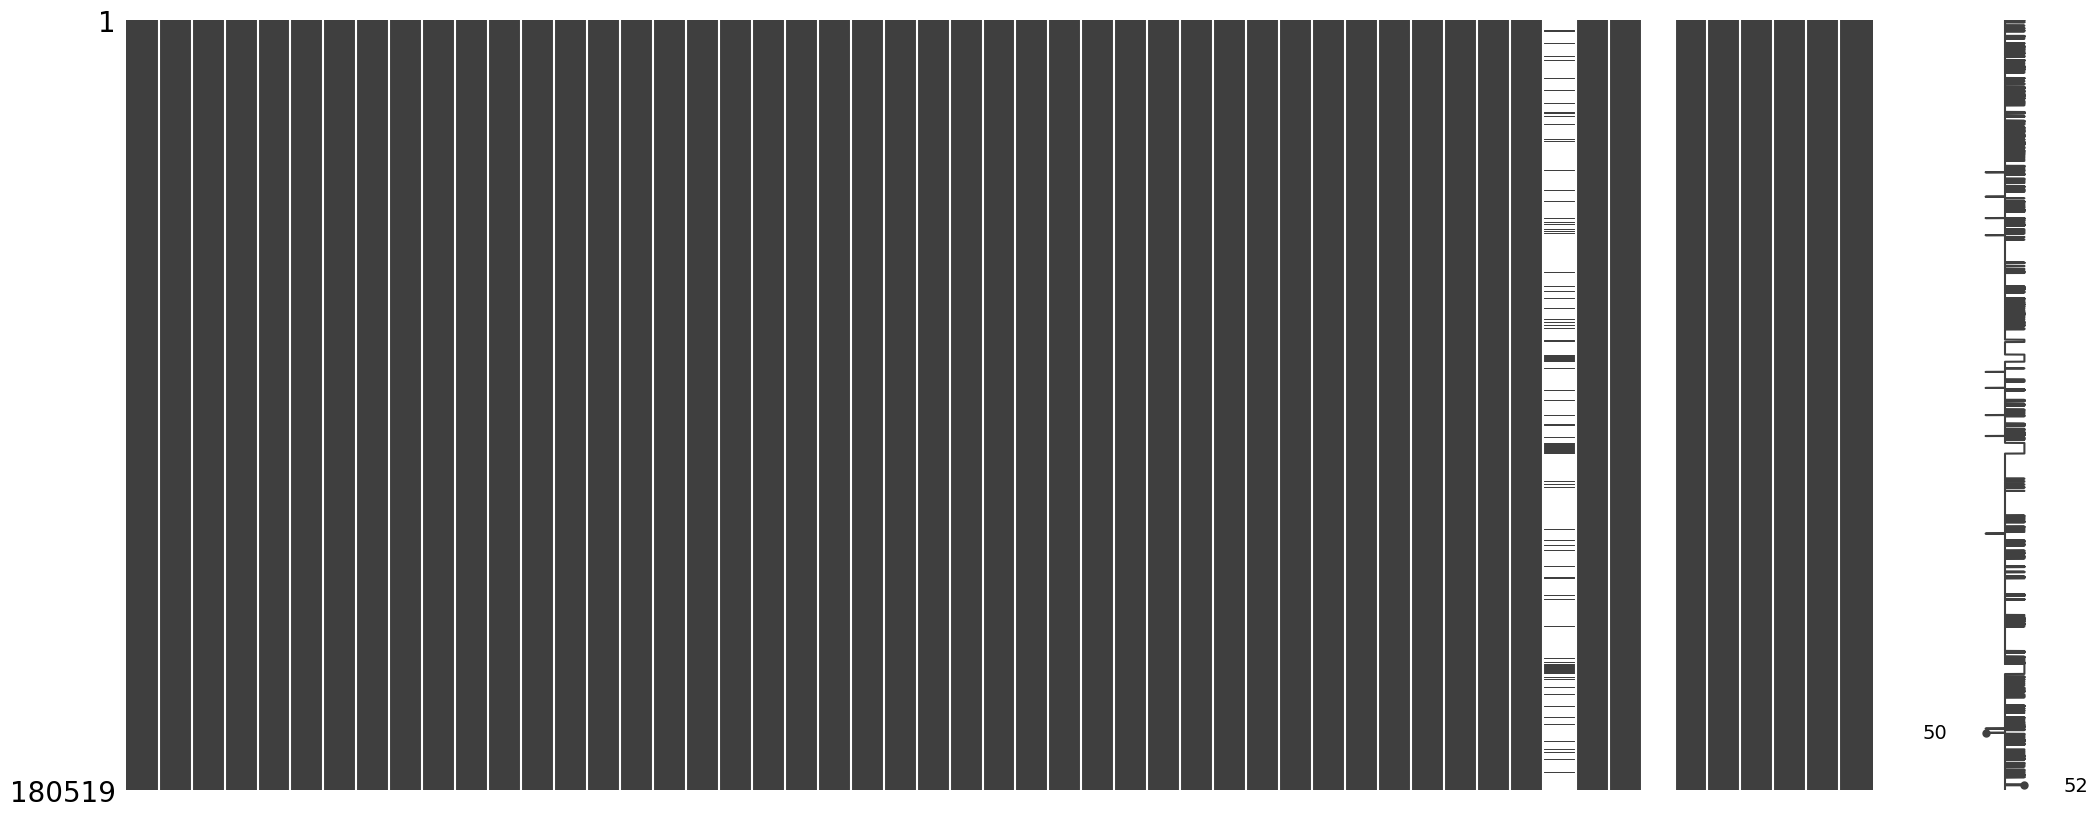

In [ ]:
# Visual representation of the missing data in the dataset

missingno.matrix(supply_chain_df)

In [ ]:
columns_with_missing = supply_chain_df.columns[supply_chain_df.isnull().any()]
supply_chain_df[columns_with_missing].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Customer Lname       180511 non-null  object 
 1   Customer Zipcode     180516 non-null  float64
 2   Order Zipcode        24840 non-null   float64
 3   Product Description  0 non-null       float64
dtypes: float64(3), object(1)
memory usage: 5.5+ MB


In [ ]:
supply_chain_df[columns_with_missing].isna().sum()

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

**Analyzing Categorical Data**

In [ ]:
supply_chain_df['Customer Country'].value_counts()

# EE. UU. (Spanish)- Estados Unidos (United States)
# Puerto Rico (Insular area)

EE. UU.        111146
Puerto Rico     69373
Name: Customer Country, dtype: int64

In [ ]:
supply_chain_df['Customer State'].value_counts()

PR       69373
CA       29223
NY       11327
TX        9103
IL        7631
FL        5456
OH        4095
PA        3824
MI        3804
NJ        3191
AZ        3026
GA        2503
MD        2415
NC        1992
CO        1914
VA        1849
OR        1668
MA        1607
TN        1582
NV        1440
MO        1354
HI        1248
CT        1094
UT         968
NM         949
LA         948
WA         920
WI         850
MN         672
SC         665
IN         581
DC         579
KY         487
KS         458
DE         269
RI         243
WV         241
OK         232
ND         215
ID         167
AR         164
MT          87
IA          67
AL          35
95758        2
91732        1
Name: Customer State, dtype: int64

In [ ]:
# Data Correction - Replacing the incorrect entries of Zipcode in the "Customer State" column with the appropriate State Code

supply_chain_df['Customer State'].replace(['95758', '91732'], 'CA', inplace = True)

In [ ]:
len(supply_chain_df['Customer State'].unique())

44

In [ ]:
print(supply_chain_df['Order Country'].unique())

['Indonesia' 'India' 'Australia' 'China' 'Japón' 'Corea del Sur'
 'Singapur' 'Turquía' 'Mongolia' 'Estados Unidos' 'Nigeria'
 'República Democrática del Congo' 'Senegal' 'Marruecos' 'Alemania'
 'Francia' 'Países Bajos' 'Reino Unido' 'Guatemala' 'El Salvador' 'Panamá'
 'República Dominicana' 'Venezuela' 'Colombia' 'Honduras' 'Brasil'
 'México' 'Uruguay' 'Argentina' 'Cuba' 'Perú' 'Nicaragua' 'Ecuador'
 'Angola' 'Sudán' 'Somalia' 'Costa de Marfil' 'Egipto' 'Italia' 'España'
 'Suecia' 'Austria' 'Canada' 'Madagascar' 'Argelia' 'Liberia' 'Zambia'
 'Níger' 'SudAfrica' 'Mozambique' 'Tanzania' 'Ruanda' 'Israel'
 'Nueva Zelanda' 'Bangladés' 'Tailandia' 'Irak' 'Arabia Saudí' 'Filipinas'
 'Kazajistán' 'Irán' 'Myanmar (Birmania)' 'Uzbekistán' 'Benín' 'Camerún'
 'Kenia' 'Togo' 'Ucrania' 'Polonia' 'Portugal' 'Rumania'
 'Trinidad y Tobago' 'Afganistán' 'Pakistán' 'Vietnam' 'Malasia'
 'Finlandia' 'Rusia' 'Irlanda' 'Noruega' 'Eslovaquia' 'Bélgica' 'Bolivia'
 'Chile' 'Jamaica' 'Yemen' 'Ghana' 'Guinea' 'E

In [ ]:
len(supply_chain_df['Order Country'].unique())

164

In [ ]:
# Replacing the contry names in Spanish with their English counterparts

translation_dict = {
    'Indonesia': 'Indonesia',
    'India': 'India',
    'Australia': 'Australia',
    'China': 'China',
    'Japón': 'Japan',
    'Corea del Sur': 'South Korea',
    'Singapur': 'Singapore',
    'Turquía': 'Turkey',
    'Mongolia': 'Mongolia',
    'Estados Unidos': 'United States',
    'Nigeria': 'Nigeria',
    'República Democrática del Congo': 'Democratic Republic of the Congo',
    'Senegal': 'Senegal',
    'Marruecos': 'Morocco',
    'Alemania': 'Germany',
    'Francia': 'France',
    'Países Bajos': 'Netherlands',
    'Reino Unido': 'United Kingdom',
    'Guatemala': 'Guatemala',
    'El Salvador': 'El Salvador',
    'Panamá': 'Panama',
    'República Dominicana': 'Dominican Republic',
    'Venezuela': 'Venezuela',
    'Colombia': 'Colombia',
    'Honduras': 'Honduras',
    'Brasil': 'Brazil',
    'México': 'Mexico',
    'Uruguay': 'Uruguay',
    'Argentina': 'Argentina',
    'Cuba': 'Cuba',
    'Perú': 'Peru',
    'Nicaragua': 'Nicaragua',
    'Ecuador': 'Ecuador',
    'Angola': 'Angola',
    'Sudán': 'Sudan',
    'Somalia': 'Somalia',
    'Costa de Marfil': 'Ivory Coast',
    'Egipto': 'Egypt',
    'Italia': 'Italy',
    'España': 'Spain',
    'Suecia': 'Sweden',
    'Austria': 'Austria',
    'Canada': 'Canada',
    'Madagascar': 'Madagascar',
    'Argelia': 'Algeria',
    'Liberia': 'Liberia',
    'Zambia': 'Zambia',
    'Níger': 'Niger',
    'SudAfrica': 'South Africa',
    'Mozambique': 'Mozambique',
    'Tanzania': 'Tanzania',
    'Ruanda': 'Rwanda',
    'Israel': 'Israel',
    'Nueva Zelanda': 'New Zealand',
    'Bangladés': 'Bangladesh',
    'Tailandia': 'Thailand',
    'Irak': 'Iraq',
    'Arabia Saudí': 'Saudi Arabia',
    'Filipinas': 'Philippines',
    'Kazajistán': 'Kazakhstan',
    'Irán': 'Iran',
    'Myanmar (Birmania)': 'Myanmar (Burma)',
    'Uzbekistán': 'Uzbekistan',
    'Benín': 'Benin',
    'Camerún': 'Cameroon',
    'Kenia': 'Kenya',
    'Togo': 'Togo',
    'Ucrania': 'Ukraine',
    'Polonia': 'Poland',
    'Portugal': 'Portugal',
    'Rumania': 'Romania',
    'Trinidad y Tobago': 'Trinidad and Tobago',
    'Afganistán': 'Afghanistan',
    'Pakistán': 'Pakistan',
    'Vietnam': 'Vietnam',
    'Malasia': 'Malaysia',
    'Finlandia': 'Finland',
    'Rusia': 'Russia',
    'Irlanda': 'Ireland',
    'Noruega': 'Norway',
    'Eslovaquia': 'Slovakia',
    'Bélgica': 'Belgium',
    'Bolivia': 'Bolivia',
    'Chile': 'Chile',
    'Jamaica': 'Jamaica',
    'Yemen': 'Yemen',
    'Ghana': 'Ghana',
    'Guinea': 'Guinea',
    'Etiopía': 'Ethiopia',
    'Bulgaria': 'Bulgaria',
    'Kirguistán': 'Kyrgyzstan',
    'Georgia': 'Georgia',
    'Nepal': 'Nepal',
    'Emiratos Árabes Unidos': 'United Arab Emirates',
    'Camboya': 'Cambodia',
    'Uganda': 'Uganda',
    'Lesoto': 'Lesotho',
    'Lituania': 'Lithuania',
    'Suiza': 'Switzerland',
    'Hungría': 'Hungary',
    'Dinamarca': 'Denmark',
    'Haití': 'Haiti',
    'Bielorrusia': 'Belarus',
    'Croacia': 'Croatia',
    'Laos': 'Laos',
    'Baréin': 'Bahrain',
    'Macedonia': 'Macedonia',
    'República Checa': 'Czech Republic',
    'Sri Lanka': 'Sri Lanka',
    'Zimbabue': 'Zimbabwe',
    'Eritrea': 'Eritrea',
    'Burkina Faso': 'Burkina Faso',
    'Costa Rica': 'Costa Rica',
    'Libia': 'Libya',
    'Barbados': 'Barbados',
    'Tayikistán': 'Tajikistan',
    'Siria': 'Syria',
    'Guadalupe': 'Guadeloupe',
    'Papúa Nueva Guinea': 'Papua New Guinea',
    'Azerbaiyán': 'Azerbaijan',
    'Turkmenistán': 'Turkmenistan',
    'Paraguay': 'Paraguay',
    'Jordania': 'Jordan',
    'Hong Kong': 'Hong Kong',
    'Martinica': 'Martinique',
    'Moldavia': 'Moldova',
    'Qatar': 'Qatar',
    'Mali': 'Mali',
    'Albania': 'Albania',
    'República del Congo': 'Republic of the Congo',
    'Bosnia y Herzegovina': 'Bosnia and Herzegovina',
    'Omán': 'Oman',
    'Túnez': 'Tunisia',
    'Sierra Leona': 'Sierra Leone',
    'Yibuti': 'Djibouti',
    'Burundi': 'Burundi',
    'Montenegro': 'Montenegro',
    'Gabón': 'Gabon',
    'Sudán del Sur': 'South Sudan',
    'Luxemburgo': 'Luxembourg',
    'Namibia': 'Namibia',
    'Mauritania': 'Mauritania',
    'Grecia': 'Greece',
    'Suazilandia': 'Eswatini',
    'Guyana': 'Guyana',
    'Guayana Francesa': 'French Guiana',
    'República Centroafricana': 'Central African Republic',
    'Taiwán': 'Taiwan',
    'Estonia': 'Estonia',
    'Líbano': 'Lebanon',
    'Chipre': 'Cyprus',
    'Guinea-Bissau': 'Guinea-Bissau',
    'Surinam': 'Suriname',
    'Belice': 'Belize',
    'Eslovenia': 'Slovenia',
    'República de Gambia': 'Republic of the Gambia',
    'Botsuana': 'Botswana',
    'Armenia': 'Armenia',
    'Guinea Ecuatorial': 'Equatorial Guinea',
    'Kuwait': 'Kuwait',
    'Bután': 'Bhutan',
    'Chad': 'Chad',
    'Serbia': 'Serbia',
    'Sáhara Occidental': 'Western Sahara'
}

# Replace the values in the 'Order Country' column
supply_chain_df.loc[:, 'Order Country'] = supply_chain_df['Order Country'].replace(translation_dict)

# Preliminary Insights

# Financial Analysis

# Analyzing Risk of Late Delivery

# Market Analysis

# Fraud Detection

# Recency Analysis